# Regressão

## Algoritmos: Linear Regression, Decision Tree Regressor, Random Forest Regressor, Polinomial Regression, Linear Regression Lasso, Linear Regression Ridge, Linear Regression Elastic Net,Polinomial Regression Lasso, Polinomial Regression Ridge e Polinomial Regression Elastic Net

## Métricas de performance: R2, MSE, RMSE, MAE e MAPE

## -----------------------------------------------------

## Linear Regression

### Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as mt

from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

### Sobre os dados de treinamento

In [2]:
# Dados de treino
x_train = pd.read_csv("../../dataset/Regressao/Treino/x_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")


In [3]:
#Identificando outliers

from scipy.stats import zscore

# Calcular Z-Score
z_scores = x_train.apply(zscore)

# Identificar outliers
outliers = (z_scores.abs() > 3)
print(outliers.sum())  # Contagem de outliers por coluna


song_duration_ms    147
acousticness          0
danceability         24
energy                2
instrumentalness    579
key                   0
liveness            289
loudness            195
audio_mode            0
speechiness         218
tempo                19
time_signature      621
audio_valence         0
dtype: int64


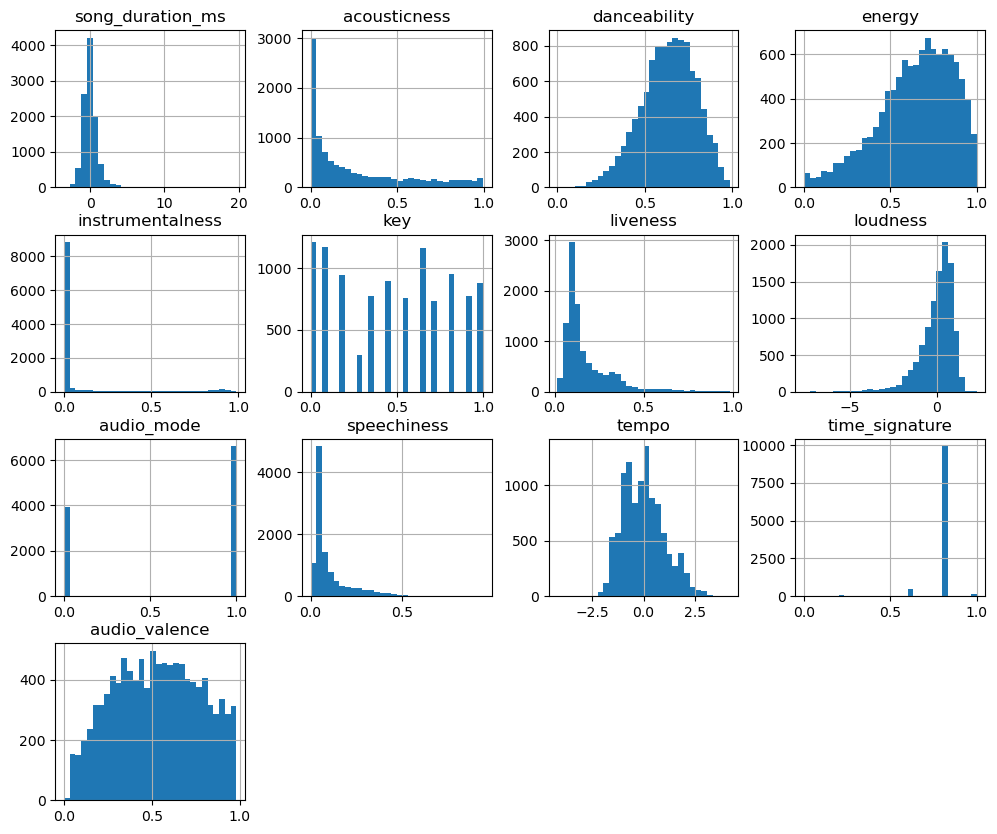

In [4]:
#Identificando outliers

import matplotlib.pyplot as plt

x_train.hist(figsize=(12, 10), bins=30)
plt.show()


In [5]:
#Removendo outliers

# Juntar DataFrames
data_train = pd.concat([x_train, y_train], axis=1)

# Configurar o Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(data_train)

# Prever outliers (-1 indica outliers, 1 valores normais)
outlier_predictions = iso.predict(data_train)

# Remover os outliers
data_train_cleaned = data_train[outlier_predictions == 1]

# Separar x_train e y_train novamente
x_train = data_train_cleaned.iloc[:, :-1]  
y_train = data_train_cleaned.iloc[:, -1]  

# Verificar dimensões antes e depois
print(f"Dimensão original: {data_train.shape}")
print(f"Dimensão após remoção de outliers: {data_train_cleaned.shape}")

Dimensão original: (10547, 14)
Dimensão após remoção de outliers: (10019, 14)


In [6]:
#Seleção de features

# Selecionar as 5 melhores features
selector = SelectKBest(score_func=f_regression, k=5)
x_train = selector.fit_transform(x_train, y_train)


In [7]:
#Treino do modelo sem outliers

lr_model = LinearRegression()

lr_model.fit(x_train,y_train)

y_pred = lr_model.predict(x_train)


In [8]:
linear_regression_train_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_train, y_pred), 2)
linear_regression_train_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_train, y_pred), 2)
linear_regression_train_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_train_MAE = mt.mean_absolute_error(y_train, y_pred)
linear_regression_train_MAPE = mt.mean_absolute_percentage_error(y_train, y_pred) * 100

print(f"R²: {linear_regression_train_R2}%")
print(f"MSE: {linear_regression_train_MSE}")
print(f"RMSE: {linear_regression_train_RMSE}")
print(f"MAE: {linear_regression_train_MAE}")
print(f"MAPE: {linear_regression_train_MAPE}%")


R²: 4.61%
MSE: 451.46
RMSE: 21.247588098417193
MAE: 16.89445044941176
MAPE: 787.9976871426866%


### Sobre os dados de validação

In [9]:
# Dados de treino
x_train = pd.read_csv("../../dataset/Regressao/Treino/x_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

# Dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

In [10]:
#Removendo outliers dos dados de treino

# Juntar DatraFrames
data_train = pd.concat([x_train, y_train], axis=1)

# Configurar o Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(data_train)

# Prever outliers (-1 indica outliers, 1 valores normais)
outlier_predictions = iso.predict(data_train)

# Remover os outliers
data_train_cleaned = data_train[outlier_predictions == 1]

# Separar x_train e y_train novamente
x_train = data_train_cleaned.iloc[:, :-1]  
y_train = data_train_cleaned.iloc[:, -1]  

# Verificar dimensões antes e depois
print(f"Dimensão original: {data_train.shape}")
print(f"Dimensão após remoção de outliers: {data_train_cleaned.shape}")

Dimensão original: (10547, 14)
Dimensão após remoção de outliers: (10019, 14)


In [11]:
# Removendo outliers dos dados de validação usando o modelo treinado com dados de treino

data_val = pd.concat([x_val, y_val], axis=1)

# Prever outliers (-1 indica outliers, 1 valores normais)
outlier_predictions = iso.predict(data_val)

# Remover os outliers
data_val_cleaned = data_val[outlier_predictions == 1]

# Separar x_val e y_val novamente
x_val = data_val_cleaned.iloc[:, :-1]  
y_val = data_val_cleaned.iloc[:, -1]   

# Verificar dimensões antes e depois
print(f"Dimensão original: {data_val.shape}")
print(f"Dimensão após remoção de outliers: {data_val_cleaned.shape}")

Dimensão original: (4521, 14)
Dimensão após remoção de outliers: (4313, 14)


In [12]:
# Selecionar as 5 melhores features
selector = SelectKBest(score_func=f_regression, k=5)

# Ajustar o selector nos dados originais e transformá-los
selector.fit(x_train, y_train)
x_train = selector.transform(x_train)

# Transformar os dados de validação com as mesmas features
x_val = selector.transform(x_val)


In [13]:
#Treinamento do modelo

lr_model = LinearRegression()

lr_model.fit(x_train,y_train)

y_pred = lr_model.predict(x_val)

In [14]:
#Métricas de performance para dados de validação

linear_regression_val_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
linear_regression_val_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
linear_regression_val_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_val_MAE = mt.mean_absolute_error(y_val, y_pred)
linear_regression_val_MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {linear_regression_val_R2}%")
print(f"MSE: {linear_regression_val_MSE}")
print(f"RMSE: {linear_regression_val_RMSE}")
print(f"MAE: {linear_regression_val_MAE}")
print(f"MAPE: {linear_regression_val_MAPE}")

R²: 4.19%
MSE: 454.86
RMSE: 21.327447104611466
MAE: 16.94128461968674
MAPE: 8.238156045198368


### Sobre os dados de teste

In [15]:
# Dados de treino
x_train = pd.read_csv("../../dataset/Regressao/Treino/x_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

# Dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

# Dados de Teste

x_test = pd.read_csv("../../dataset/Regressao/Teste/X_test.csv")
y_test = pd.read_csv("../../dataset/Regressao/Teste/y_test.csv")

In [16]:
#Removendo outliers dos dados de treino

# Juntar DataFrames
data_train = pd.concat([x_train, y_train], axis=1)

# Configurar o Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(data_train)

# Prever outliers (-1 indica outliers, 1 valores normais)
outlier_predictions = iso.predict(data_train)

# Remover os outliers
data_train_cleaned = data_train[outlier_predictions == 1]

# Separar x_train e y_train novamente
x_train = data_train_cleaned.iloc[:, :-1]  
y_train = data_train_cleaned.iloc[:, -1]   

# Verificar dimensões antes e depois
print(f"Dimensão original: {data_train.shape}")
print(f"Dimensão após remoção de outliers: {data_train_cleaned.shape}")

Dimensão original: (10547, 14)
Dimensão após remoção de outliers: (10019, 14)


In [17]:
# Removendo outliers dos dados de validação usando o modelo treinado com dados de treino

data_val = pd.concat([x_val, y_val], axis=1)

# Prever outliers (-1 indica outliers, 1 valores normais)
outlier_predictions = iso.predict(data_val)

# Remover os outliers
data_val_cleaned = data_val[outlier_predictions == 1]

# Separar x_val e y_val novamente
x_val = data_val_cleaned.iloc[:, :-1]  # Todas as colunas exceto a última
y_val = data_val_cleaned.iloc[:, -1]   # Apenas a última coluna (y_train)

# Verificar dimensões antes e depois
print(f"Dimensão original: {data_val.shape}")
print(f"Dimensão após remoção de outliers: {data_val_cleaned.shape}")

Dimensão original: (4521, 14)
Dimensão após remoção de outliers: (4313, 14)


In [18]:
# Removendo outliers dos dados de teste usando o modelo treinado com dados de treino

data_test = pd.concat([x_test, y_test], axis=1)

# Prever outliers (-1 indica outliers, 1 valores normais)
outlier_predictions = iso.predict(data_test)

# Remover os outliers
data_test_cleaned = data_test[outlier_predictions == 1]

# Separar x_test e y_test
x_test = data_test_cleaned.iloc[:, :-1] 
y_test = data_test_cleaned.iloc[:, -1]   

# Verificar dimensões antes e depois
print(f"Dimensão original: {data_test.shape}")
print(f"Dimensão após remoção de outliers: {data_test_cleaned.shape}")

Dimensão original: (3767, 14)
Dimensão após remoção de outliers: (3587, 14)


In [19]:
# Selecionar as 5 melhores features
selector = SelectKBest(score_func=f_regression, k=5)

# Ajustar o selector nos dados originais e transformá-los
selector.fit(x_train, y_train)
x_train = selector.transform(x_train)

# Transformar os dados de validação com as mesmas features
x_val = selector.transform(x_val)

# Transformar os dados de teste com as mesmas features
x_test = selector.transform(x_test)

In [20]:
#Treinamento do modelo com dados de treino e validação juntos

lr_model = LinearRegression()

lr_model.fit(np.concatenate( (x_train, x_val) ), np.concatenate((y_train, y_val)))

y_pred = lr_model.predict(x_test)

In [21]:
#Métricas de performance para dados de teste

linear_regression_test_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_test, y_pred), 2)
linear_regression_test_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_test, y_pred), 2)
linear_regression_test_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_test_MAE = mt.mean_absolute_error(y_test, y_pred)
linear_regression_test_MAPE = mt.mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {linear_regression_test_R2}%")
print(f"MSE: {linear_regression_test_MSE}")
print(f"RMSE: {linear_regression_test_RMSE}")
print(f"MAE: {linear_regression_test_MAE}")
print(f"MAPE: {linear_regression_test_MAPE}")

R²: 4.27%
MSE: 460.47
RMSE: 21.458564723671525
MAE: 17.1101521266827
MAPE: 8.010272953827318


## Decision Tree Regressor

### Imports

In [22]:
import pandas as pd
import sklearn.metrics as mt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

### Sobre os dados de treinamento

In [23]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

In [24]:
#Escolhendo melhores parâmetros

param_grid = {
    'max_depth': [3, 5, 10, None],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

grid_search.fit(x_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_
print("Melhores parâmetros:", grid_search.best_params_)

best_max_depth = grid_search.best_params_['max_depth']

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores parâmetros: {'max_depth': 5}


In [25]:
#Treinamento do modelo com os melhores parâmetros

model = DecisionTreeRegressor(max_depth=best_max_depth)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

In [26]:
#Métricas de performance para dados de treino

decision_tree_regression_train_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_train, y_pred), 2)
decision_tree_regression_train_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_train, y_pred), 2)
decision_tree_regression_train_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
decision_tree_regression_train_MAE = mt.mean_absolute_error(y_train, y_pred)
decision_tree_regression_train_MAPE = mt.mean_absolute_percentage_error(y_train, y_pred)

print(f"R²: {decision_tree_regression_train_R2}%")
print(f"MSE: {decision_tree_regression_train_MSE}")
print(f"RMSE: {decision_tree_regression_train_RMSE}")
print(f"MAE: {decision_tree_regression_train_MAE}")
print(f"MAPE: {decision_tree_regression_train_MAPE}")

R²: 11.35%
MSE: 423.75
RMSE: 20.5851888502389
MAE: 16.368766312461414
MAPE: 7.869536027810438


### Sobre os dados de validação

In [27]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

In [28]:
#Escolhendo melhores parâmetros

param_grid = {
    'max_depth': [3, 5, 10, None],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

grid_search.fit(x_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_
print("Melhores parâmetros:", grid_search.best_params_)

best_max_depth = grid_search.best_params_['max_depth']

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores parâmetros: {'max_depth': 5}


In [29]:
#Treinamento do modelo com os melhores parâmetros

model = DecisionTreeRegressor(max_depth=best_max_depth)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

In [30]:
#Métricas de performance para dados de validação

decision_tree_regression_val_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
decision_tree_regression_val_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
decision_tree_regression_val_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
decision_tree_regression_val_MAE = mt.mean_absolute_error(y_val, y_pred)
decision_tree_regression_val_MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {decision_tree_regression_val_R2}%")
print(f"MSE: {decision_tree_regression_val_MSE}")
print(f"RMSE: {decision_tree_regression_val_RMSE}")
print(f"MAE: {decision_tree_regression_val_MAE}")
print(f"MAPE: {decision_tree_regression_val_MAPE}")

R²: 6.36%
MSE: 447.16
RMSE: 21.14615804348393
MAE: 16.843451865846717
MAPE: 8.395778483246199


### Sobre os dados de teste

In [31]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

#Importando dados de teste
x_test = pd.read_csv("../../dataset/Regressao/Teste/X_test.csv")
y_test = pd.read_csv("../../dataset/Regressao/Teste/y_test.csv")

In [32]:
#Escolhendo melhores parâmetros

param_grid = {
    'max_depth': [3, 5, 10, None],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

grid_search.fit(x_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_
print("Melhores parâmetros:", grid_search.best_params_)

best_max_depth = grid_search.best_params_['max_depth']

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores parâmetros: {'max_depth': 5}


In [33]:
#Treinamento do modelo com os melhores parâmetros   
model = DecisionTreeRegressor(max_depth=best_max_depth)
model.fit(np.concatenate( (x_train, x_val) ), np.concatenate((y_train, y_val)))
y_pred = model.predict(x_test)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [34]:
#Métricas de performance para dados de teste

decision_tree_regression_test_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_test, y_pred), 2)
decision_tree_regression_test_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_test, y_pred), 2)
decision_tree_regression_test_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
decision_tree_regression_test_MAE = mt.mean_absolute_error(y_test, y_pred)
decision_tree_regression_test_MAPE = mt.mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {decision_tree_regression_test_R2}%")
print(f"MSE: {decision_tree_regression_test_MSE}")
print(f"RMSE: {decision_tree_regression_test_RMSE}")
print(f"MAE: {decision_tree_regression_test_MAE}")
print(f"MAPE: {decision_tree_regression_test_MAPE}")

R²: 9.05%
MSE: 442.85
RMSE: 21.0440015206234
MAE: 16.82978094998882
MAPE: 7.883226145162678


## Random Forest Regressor

### Imports

In [35]:
import numpy as np
import pandas as pd
import sklearn.metrics as mt

from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

### Sobre os dados de treino

In [36]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

In [37]:
#Reduzindo o conjunto de dados de forma aleatória

# Amostra aleatória sem reposição
x_sample, y_sample = resample(
    x_train, y_train,
    n_samples=1000,       # Quantidade de amostras desejadas
    random_state=42       # Garantir reprodutibilidade
)

In [38]:
# Parâmetros para busca aleatória
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None]
}

# Instancia o modelo RandomForestRegressor
rf = RandomForestRegressor()

# RandomizedSearchCV para busca aleatória
random_search = RandomizedSearchCV(
    estimator=rf,                     
    param_distributions=param_dist,   
    n_iter=100,                       
    cv=5,                             
    scoring='neg_mean_squared_error', 
    verbose=2,                        
    random_state=42,                  
    n_jobs=-1                         
)

# Realiza a busca com os dados de treino
random_search.fit(x_sample, y_sample)

# Exibe os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:", random_search.best_params_)
print("Melhor desempenho (neg_mean_squared_error):", random_search.best_score_)

# Selecionar cada parâmetro individualmente
best_n_estimators = random_search.best_params_['n_estimators']
best_max_depth = random_search.best_params_['max_depth']

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Melhores parâmetros encontrados: {'n_estimators': 700, 'max_depth': 40}
Melhor desempenho (neg_mean_squared_error): -425.63700643677555


In [39]:
#Treinamento do algoritmo
rf = RandomForestRegressor(max_depth=best_max_depth,n_estimators=best_n_estimators,random_state=42)
rf.fit(x_train, y_train)

#Previsão
y_pred = rf.predict(x_train)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [40]:
#Métricas de performance para dados de treino

random_forest_regressor_train_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_train, y_pred), 2)
random_forest_regressor_train_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_train, y_pred), 2)
random_forest_regressor_train_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
random_forest_regressor_train_MAE = mt.mean_absolute_error(y_train, y_pred)
random_forest_regressor_train_MAPE = mt.mean_absolute_percentage_error(y_train, y_pred)

print(f"R²: {random_forest_regressor_train_R2}%")
print(f"MSE: {random_forest_regressor_train_MSE}")
print(f"RMSE: {random_forest_regressor_train_RMSE}")
print(f"MAE: {random_forest_regressor_train_MAE}")
print(f"MAPE: {random_forest_regressor_train_MAPE}")

R²: 90.63%
MSE: 44.81
RMSE: 6.694027188471825
MAE: 4.798755091740677
MAPE: 2.6280371046999225


### Sobre os dados de validação

In [41]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

In [42]:
# Parâmetros para busca aleatória
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None]
}

# Instancia o modelo RandomForestRegressor
rf = RandomForestRegressor()

# RandomizedSearchCV para busca aleatória
random_search = RandomizedSearchCV(
    estimator=rf,                     
    param_distributions=param_dist,   
    n_iter=100,                       
    cv=5,                             
    scoring='neg_mean_squared_error', 
    verbose=2,                        
    random_state=42,                  
    n_jobs=-1                         
)

# Realiza a busca com os dados de treino
random_search.fit(x_sample, y_sample)

# Exibe os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:", random_search.best_params_)
print("Melhor desempenho (neg_mean_squared_error):", random_search.best_score_)

# Selecionar cada parâmetro individualmente
best_n_estimators = random_search.best_params_['n_estimators']
best_max_depth = random_search.best_params_['max_depth']

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Melhores parâmetros encontrados: {'n_estimators': 300, 'max_depth': 70}
Melhor desempenho (neg_mean_squared_error): -425.92373099288886


In [43]:
#Treinamento do algoritmo
rf = RandomForestRegressor(max_depth=best_max_depth, n_estimators=best_n_estimators, random_state=42)
rf.fit(x_train, y_train)

#Previsão
y_pred = rf.predict(x_val)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [44]:
#Métricas de performance para dados de validação

random_forest_regressor_val_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
random_forest_regressor_val_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
random_forest_regressor_val_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
random_forest_regressor_val_MAE = mt.mean_absolute_error(y_val, y_pred)
random_forest_regressor_val_MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {random_forest_regressor_val_R2}%")
print(f"MSE: {random_forest_regressor_val_MSE}")
print(f"RMSE: {random_forest_regressor_val_RMSE}")
print(f"MAE: {random_forest_regressor_val_MAE}")
print(f"MAPE: {random_forest_regressor_val_MAPE}")

R²: 34.0%
MSE: 315.14
RMSE: 17.752182964356805
MAE: 12.935710613307187
MAPE: 7.036928486212441


### Sobre os dados de teste

In [47]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

#Importando dados de teste
x_test = pd.read_csv("../../dataset/Regressao/Teste/X_test.csv")
y_test = pd.read_csv("../../dataset/Regressao/Teste/y_test.csv")

In [48]:
# Parâmetros para busca aleatória
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None]
}

# Instancia o modelo RandomForestRegressor
rf = RandomForestRegressor()

# RandomizedSearchCV para busca aleatória
random_search = RandomizedSearchCV(
    estimator=rf,                     
    param_distributions=param_dist,   
    n_iter=100,                       
    cv=5,                             
    scoring='neg_mean_squared_error', 
    verbose=2,                        
    random_state=42,                  
    n_jobs=-1                         
)

# Realiza a busca com os dados de treino
random_search.fit(x_sample, y_sample)

# Exibe os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:", random_search.best_params_)
print("Melhor desempenho (neg_mean_squared_error):", random_search.best_score_)

# Selecionar cada parâmetro individualmente
best_n_estimators = random_search.best_params_['n_estimators']
best_max_depth = random_search.best_params_['max_depth']

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Melhores parâmetros encontrados: {'n_estimators': 400, 'max_depth': 80}
Melhor desempenho (neg_mean_squared_error): -426.0661666240625


In [49]:
#Treinamento do algoritmo
rf = RandomForestRegressor(max_depth=best_max_depth, n_estimators=best_n_estimators, random_state=42)
rf.fit(x_train, y_train)

#Previsão
y_pred = rf.predict(x_val)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [50]:
#Métricas de performance para dados de validação

random_forest_regressor_test_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
random_forest_regressor_test_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
random_forest_regressor_test_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
random_forest_regressor_test_MAE = mt.mean_absolute_error(y_val, y_pred)
random_forest_regressor_test_MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {random_forest_regressor_test_R2}%")
print(f"MSE: {random_forest_regressor_test_MSE}")
print(f"RMSE: {random_forest_regressor_test_RMSE}")
print(f"MAE: {random_forest_regressor_test_MAE}")
print(f"MAPE: {random_forest_regressor_test_MAPE}")

R²: 33.86%
MSE: 315.82
RMSE: 17.771325217889633
MAE: 12.950201466701158
MAPE: 7.054799143427394


In [51]:
#Treinamento do algoritmo
rf = RandomForestRegressor(max_depth=best_max_depth, n_estimators=best_n_estimators, random_state=42)
rf.fit(np.concatenate( (x_train, x_val) ), np.concatenate((y_train, y_val)))

#Previsão
y_pred = rf.predict(x_test)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [52]:
#Métricas de performance para dados de teste

random_forest_regressor_test_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_test, y_pred), 2)
random_forest_regressor_test_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_test, y_pred), 2)
random_forest_regressor_test_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
random_forest_regressor_test_MAE = mt.mean_absolute_error(y_test, y_pred)
random_forest_regressor_test_MAPE = mt.mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {random_forest_regressor_test_R2}%")
print(f"MSE: {random_forest_regressor_test_MSE}")
print(f"RMSE: {random_forest_regressor_test_RMSE}")
print(f"MAE: {random_forest_regressor_test_MAE}")
print(f"MAPE: {random_forest_regressor_test_MAPE}")

R²: 40.62%
MSE: 289.11
RMSE: 17.003234986319516
MAE: 12.21033327728429
MAPE: 6.282725794215609


## Polinomial Regression

### Imports

In [53]:
import pandas as pd
import numpy as np
import sklearn.metrics as mt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### Sobre os dados de treino

In [54]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")


In [55]:
degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
errors = []  # Para armazenar erros 

for degree in degrees:
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    
    # Treinar modelo
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    # Prever nos dados de treino
    y_train_pred = model.predict(x_train_poly)
    train_error = mean_squared_error(y_train, y_train_pred)
    errors.append(train_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(errors)]
print(f"Melhor grau polinomial: {best_degree}")


Melhor grau polinomial: 5


In [56]:
#Transformar os dados em características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)

x_train_poly = poly_features.fit_transform(x_train)

# Treinar o modelo
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = model.predict(x_train_poly)

In [57]:
#Métricas de performance para dados de treino

polinomial_regression_train_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_train, y_pred), 2)
polinomial_regression_train_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_train, y_pred), 2)
polinomial_regression_train_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_train_MAE = mt.mean_absolute_error(y_train, y_pred)
polinomial_regression_train_MAPE = mt.mean_absolute_percentage_error(y_train, y_pred)

print(f"R²: {polinomial_regression_train_R2}%")
print(f"MSE: {polinomial_regression_train_MSE}")
print(f"RMSE: {polinomial_regression_train_RMSE}")
print(f"MAE: {polinomial_regression_train_MAE}")
print(f"MAPE: {polinomial_regression_train_MAPE}")

R²: 72.53%
MSE: 131.31
RMSE: 11.459057552870568
MAE: 7.266166434089909
MAPE: 2.215335300014142


### Sobre os dados de validação

In [58]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")


In [59]:
degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
validation_errors = []  # Para armazenar erros de validação

for degree in degrees:
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(x_train)
    X_val_poly = poly_features.transform(x_val)
    
    # Treinar modelo
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Prever nos dados de validação
    y_val_pred = model.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_val_pred)
    validation_errors.append(val_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(validation_errors)]
print(f"Melhor grau polinomial: {best_degree}")


Melhor grau polinomial: 2


In [60]:
#Transformar os dados em características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)

x_train_poly = poly_features.fit_transform(x_train)
x_val_poly = poly_features.transform(x_val)

# Treinar o modelo
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = model.predict(x_val_poly)

In [61]:
#Métricas de performance para dados de validação

polinomial_regression_val_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
polinomial_regression_val_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
polinomial_regression_val_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_val_MAE = mt.mean_absolute_error(y_val, y_pred)
polinomial_regression_val_MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {polinomial_regression_val_R2}%")
print(f"MSE: {polinomial_regression_val_MSE}")
print(f"RMSE: {polinomial_regression_val_RMSE}")
print(f"MAE: {polinomial_regression_val_MAE}")
print(f"MAPE: {polinomial_regression_val_MAPE}")

R²: 6.65%
MSE: 445.77
RMSE: 21.11326597189549
MAE: 16.749939090484027
MAPE: 8.54793103460539


### Sobre os dados de teste

In [62]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

#Importando dados de teste
x_test = pd.read_csv("../../dataset/Regressao/Teste/X_test.csv")
y_test = pd.read_csv("../../dataset/Regressao/Teste/y_test.csv")

In [63]:
degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
validation_errors = []  # Para armazenar erros de validação

for degree in degrees:
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(x_train)
    X_val_poly = poly_features.transform(x_val)
    
    # Treinar modelo
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Prever nos dados de validação
    y_val_pred = model.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_val_pred)
    validation_errors.append(val_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(validation_errors)]
print(f"Melhor grau polinomial: {best_degree}")

Melhor grau polinomial: 2


In [64]:
#Transformar os dados em características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)

x_train_poly = poly_features.fit_transform(x_train)
x_val_poly = poly_features.transform(x_val)
x_test_poly = poly_features.transform(x_test)

In [65]:
# Treinar o modelo
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = model.predict(x_val_poly)

In [66]:
#Métricas de performance para dados de validação

R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
RMSE = rmse_out_10 = np.sqrt(mse_out_10)
MAE = mt.mean_absolute_error(y_val, y_pred)
MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {R2}%")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")

R²: 6.65%
MSE: 445.77
RMSE: 21.11326597189549
MAE: 16.749939090484027
MAPE: 8.54793103460539


In [67]:
# Treinar o modelo
model = LinearRegression()
model.fit(np.concatenate( (x_train_poly, x_val_poly) ), np.concatenate((y_train, y_val)))

# Previsão do algoritmo
y_pred = model.predict(x_test_poly)

In [68]:
#Métricas de performance para dados de teste

polinomial_regression_test_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_test, y_pred), 2)
polinomial_regression_test_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_test, y_pred), 2)
polinomial_regression_test_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_test_MAE = mt.mean_absolute_error(y_test, y_pred)
polinomial_regression_test_MAPE = mt.mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {polinomial_regression_test_R2}%")
print(f"MSE: {polinomial_regression_test_MSE}")
print(f"RMSE: {polinomial_regression_test_RMSE}")
print(f"MAE: {polinomial_regression_test_MAE}")
print(f"MAPE: {polinomial_regression_test_MAPE}")

R²: 9.09%
MSE: 442.64
RMSE: 21.039011383617815
MAE: 16.736414061349993
MAPE: 8.276971685015472


## Linear Regression Lasso

### Imports

In [69]:
import numpy as np
import pandas as pd

import sklearn.metrics as mt
from sklearn.linear_model import Lasso


### Sobre os dados de treino

In [70]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

In [71]:
#Escolha do melhor parâmetro

alphas = [0.01, 0.1, 1, 10,20]
max_iters = [100, 500, 1000, 2000]
best_alpha = None
best_score = float('inf')

for alpha in alphas:
    for max_iter in max_iters:
        # Instanciar e treinar o modelo
        lasso = Lasso(alpha=alpha, max_iter=max_iter, random_state=42)
        lasso.fit(x_train, y_train)

        # Avaliar no conjunto de treino
        y_train_pred = lasso.predict(x_train)
        score = mt.mean_squared_error(y_train, y_train_pred)

        print(f"Alpha: {alpha}, Max Iter: {max_iter}, Validation MSE: {score}")

        # Atualizar os melhores parâmetros
        if score < best_score:
            best_score = score
            best_alpha = alpha
            best_max_iter = max_iter

print(f"Best Alpha: {best_alpha}, Best Max Iter: {best_max_iter}")

Alpha: 0.01, Max Iter: 100, Validation MSE: 456.0574152288833
Alpha: 0.01, Max Iter: 500, Validation MSE: 456.0574152288833
Alpha: 0.01, Max Iter: 1000, Validation MSE: 456.0574152288833
Alpha: 0.01, Max Iter: 2000, Validation MSE: 456.0574152288833
Alpha: 0.1, Max Iter: 100, Validation MSE: 458.3093966319514
Alpha: 0.1, Max Iter: 500, Validation MSE: 458.3093966319514
Alpha: 0.1, Max Iter: 1000, Validation MSE: 458.3093966319514
Alpha: 0.1, Max Iter: 2000, Validation MSE: 458.3093966319514
Alpha: 1, Max Iter: 100, Validation MSE: 474.47483414340275
Alpha: 1, Max Iter: 500, Validation MSE: 474.47483414340275
Alpha: 1, Max Iter: 1000, Validation MSE: 474.47483414340275
Alpha: 1, Max Iter: 2000, Validation MSE: 474.47483414340275
Alpha: 10, Max Iter: 100, Validation MSE: 478.012559979818
Alpha: 10, Max Iter: 500, Validation MSE: 478.012559979818
Alpha: 10, Max Iter: 1000, Validation MSE: 478.012559979818
Alpha: 10, Max Iter: 2000, Validation MSE: 478.012559979818
Alpha: 20, Max Iter: 100

In [72]:
#Treinamento do modelo

lasso = Lasso(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_train)

In [73]:
#Métricas de performance para dados de treino

linear_regression_lasso_train_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_train, y_pred), 4)
linear_regression_lasso_train_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_train, y_pred), 2)
linear_regression_lasso_train_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_lasso_train_MAE = mt.mean_absolute_error(y_train, y_pred)
linear_regression_lasso_train_MAPE = mt.mean_absolute_percentage_error(y_train, y_pred)

print(f"R²: {linear_regression_lasso_train_R2}%")
print(f"MSE: {linear_regression_lasso_train_MSE}")
print(f"RMSE: {linear_regression_lasso_train_RMSE}")
print(f"MAE: {linear_regression_lasso_train_MAE}")
print(f"MAPE: {linear_regression_lasso_train_MAPE}")

R²: 4.593%
MSE: 456.06
RMSE: 21.35556133656992
MAE: 17.00211535840327
MAPE: 8.660670204946179


### Sobre os dados de validação

In [74]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

In [75]:
#Escolha do melhor parâmetro

alphas = [0.01, 0.1, 1, 10,20]
max_iters = [100, 500, 1000, 2000]
best_alpha = None
best_score = float('inf')

for alpha in alphas:
    for max_iter in max_iters:
        # Instanciar e treinar o modelo
        lasso = Lasso(alpha=alpha, max_iter=max_iter, random_state=42)
        lasso.fit(x_train, y_train)

        # Avaliar no conjunto de validação
        y_val_pred = lasso.predict(x_val)
        score = mt.mean_squared_error(y_val, y_val_pred)

        print(f"Alpha: {alpha}, Max Iter: {max_iter}, Validation MSE: {score}")

        # Atualizar os melhores parâmetros
        if score < best_score:
            best_score = score
            best_alpha = alpha
            best_max_iter = max_iter

print(f"Best Alpha: {best_alpha}, Best Max Iter: {best_max_iter}")

Alpha: 0.01, Max Iter: 100, Validation MSE: 458.4454069886254
Alpha: 0.01, Max Iter: 500, Validation MSE: 458.4454069886254
Alpha: 0.01, Max Iter: 1000, Validation MSE: 458.4454069886254
Alpha: 0.01, Max Iter: 2000, Validation MSE: 458.4454069886254
Alpha: 0.1, Max Iter: 100, Validation MSE: 459.75041129600146
Alpha: 0.1, Max Iter: 500, Validation MSE: 459.75041129600146
Alpha: 0.1, Max Iter: 1000, Validation MSE: 459.75041129600146
Alpha: 0.1, Max Iter: 2000, Validation MSE: 459.75041129600146
Alpha: 1, Max Iter: 100, Validation MSE: 473.7470809154487
Alpha: 1, Max Iter: 500, Validation MSE: 473.7470809154487
Alpha: 1, Max Iter: 1000, Validation MSE: 473.7470809154487
Alpha: 1, Max Iter: 2000, Validation MSE: 473.7470809154487
Alpha: 10, Max Iter: 100, Validation MSE: 477.5119556252973
Alpha: 10, Max Iter: 500, Validation MSE: 477.5119556252973
Alpha: 10, Max Iter: 1000, Validation MSE: 477.5119556252973
Alpha: 10, Max Iter: 2000, Validation MSE: 477.5119556252973
Alpha: 20, Max Iter:

In [76]:
#Treinamento do modelo
lasso = Lasso(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
lasso.fit(x_train, y_train)

#Previsão
y_pred = lasso.predict(x_val)

In [77]:
#Métricas de performance para dados de validação

linear_regression_lasso_val_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
linear_regression_lasso_val_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
linear_regression_lasso_val_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_lasso_val_MAE = mt.mean_absolute_error(y_val, y_pred)
linear_regression_lasso_val_MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {linear_regression_lasso_val_R2}%")
print(f"MSE: {linear_regression_lasso_val_MSE}")
print(f"RMSE: {linear_regression_lasso_val_RMSE}")
print(f"MAE: {linear_regression_lasso_val_MAE}")
print(f"MAPE: {linear_regression_lasso_val_MAPE}")


R²: 3.99%
MSE: 458.45
RMSE: 21.411445537375563
MAE: 17.03824289549502
MAPE: 8.686214930608234


### Sobre os dados de teste

In [78]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

#Importando dados de teste
x_test = pd.read_csv("../../dataset/Regressao/Teste/X_test.csv")
y_test = pd.read_csv("../../dataset/Regressao/Teste/y_test.csv")

In [79]:
#Escolha do melhor parâmetro

alphas = [0.01, 0.1, 1, 10,20]
max_iters = [100, 500, 1000, 2000]
best_alpha = None
best_score = float('inf')

for alpha in alphas:
    for max_iter in max_iters:
        # Instanciar e treinar o modelo
        lasso = Lasso(alpha=alpha, max_iter=max_iter, random_state=42)
        lasso.fit(x_train, y_train)

        # Avaliar no conjunto de validação
        y_val_pred = lasso.predict(x_val)
        score = mt.mean_squared_error(y_val, y_val_pred)

        print(f"Alpha: {alpha}, Max Iter: {max_iter}, Validation MSE: {score}")

        # Atualizar os melhores parâmetros
        if score < best_score:
            best_score = score
            best_alpha = alpha
            best_max_iter = max_iter

print(f"Best Alpha: {best_alpha}, Best Max Iter: {best_max_iter}")

Alpha: 0.01, Max Iter: 100, Validation MSE: 458.4454069886254
Alpha: 0.01, Max Iter: 500, Validation MSE: 458.4454069886254
Alpha: 0.01, Max Iter: 1000, Validation MSE: 458.4454069886254
Alpha: 0.01, Max Iter: 2000, Validation MSE: 458.4454069886254
Alpha: 0.1, Max Iter: 100, Validation MSE: 459.75041129600146
Alpha: 0.1, Max Iter: 500, Validation MSE: 459.75041129600146
Alpha: 0.1, Max Iter: 1000, Validation MSE: 459.75041129600146
Alpha: 0.1, Max Iter: 2000, Validation MSE: 459.75041129600146
Alpha: 1, Max Iter: 100, Validation MSE: 473.7470809154487
Alpha: 1, Max Iter: 500, Validation MSE: 473.7470809154487
Alpha: 1, Max Iter: 1000, Validation MSE: 473.7470809154487
Alpha: 1, Max Iter: 2000, Validation MSE: 473.7470809154487
Alpha: 10, Max Iter: 100, Validation MSE: 477.5119556252973
Alpha: 10, Max Iter: 500, Validation MSE: 477.5119556252973
Alpha: 10, Max Iter: 1000, Validation MSE: 477.5119556252973
Alpha: 10, Max Iter: 2000, Validation MSE: 477.5119556252973
Alpha: 20, Max Iter:

In [80]:
#Treinamento do modelo
lasso = Lasso(alpha=best_alpha, max_iter=best_max_iter, random_state=42)
lasso.fit(x_train, y_train)

#Previsão
y_pred = lasso.predict(x_val)

In [81]:
#Métricas de performance para dados de validação

R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
RMSE = rmse_out_10 = np.sqrt(mse_out_10)
MAE = mt.mean_absolute_error(y_val, y_pred)
MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {R2}%")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")

R²: 3.99%
MSE: 458.45
RMSE: 21.411445537375563
MAE: 17.03824289549502
MAPE: 8.686214930608234


In [82]:
#Treinamento do modelo
lasso = Lasso(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
lasso.fit(np.concatenate((x_train, x_val) ), np.concatenate((y_train, y_val)))

#Previsão
y_pred = lasso.predict(x_test)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [83]:
#Métricas de performance para dados de teste

linear_regression_lasso_test_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_test, y_pred), 2)
linear_regression_lasso_test_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_test, y_pred), 2)
linear_regression_lasso_test_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_lasso_test_MAE = mt.mean_absolute_error(y_test, y_pred)
linear_regression_lasso_test_MAPE = mt.mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {linear_regression_lasso_test_R2}%")
print(f"MSE: {linear_regression_lasso_test_MSE}")
print(f"RMSE: {linear_regression_lasso_test_RMSE}")
print(f"MAE: {linear_regression_lasso_test_MAE}")
print(f"MAPE: {linear_regression_lasso_test_MAPE}")


R²: 5.08%
MSE: 462.17
RMSE: 21.4981394543807
MAE: 17.145311551385827
MAPE: 8.549060205507839


## Linear Regression Ridge

### Imports

In [84]:
import numpy as np
import pandas as pd

import sklearn.metrics as mt
from sklearn.linear_model import Ridge

### Sobre os dados de treino

In [85]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

In [86]:
#Escolha do melhor parâmetro

alphas = [0.01, 0.1, 1, 10,20]
max_iters = [100, 500, 1000, 2000]
best_alpha = None
best_score = float('inf')

for alpha in alphas:
    for max_iter in max_iters:
        # Instanciar e treinar o modelo
        ridge = Ridge(alpha=alpha, max_iter=max_iter, random_state=42)
        ridge.fit(x_train, y_train)

        # Avaliar no conjunto de treino
        y_train_pred = ridge.predict(x_train)
        score = mt.mean_squared_error(y_train, y_train_pred)

        print(f"Alpha: {alpha}, Max Iter: {max_iter}, Validation MSE: {score}")

        # Atualizar os melhores parâmetros
        if score < best_score:
            best_score = score
            best_alpha = alpha
            best_max_iter = max_iter

print(f"Best Alpha: {best_alpha}, Best Max Iter: {best_max_iter}")

Alpha: 0.01, Max Iter: 100, Validation MSE: 455.9961118552722
Alpha: 0.01, Max Iter: 500, Validation MSE: 455.9961118552722
Alpha: 0.01, Max Iter: 1000, Validation MSE: 455.9961118552722
Alpha: 0.01, Max Iter: 2000, Validation MSE: 455.9961118552722
Alpha: 0.1, Max Iter: 100, Validation MSE: 455.99611478296237
Alpha: 0.1, Max Iter: 500, Validation MSE: 455.99611478296237
Alpha: 0.1, Max Iter: 1000, Validation MSE: 455.99611478296237
Alpha: 0.1, Max Iter: 2000, Validation MSE: 455.99611478296237
Alpha: 1, Max Iter: 100, Validation MSE: 455.99640059223816
Alpha: 1, Max Iter: 500, Validation MSE: 455.99640059223816
Alpha: 1, Max Iter: 1000, Validation MSE: 455.99640059223816
Alpha: 1, Max Iter: 2000, Validation MSE: 455.99640059223816
Alpha: 10, Max Iter: 100, Validation MSE: 456.0197627727942
Alpha: 10, Max Iter: 500, Validation MSE: 456.0197627727942
Alpha: 10, Max Iter: 1000, Validation MSE: 456.0197627727942
Alpha: 10, Max Iter: 2000, Validation MSE: 456.0197627727942
Alpha: 20, Max I

In [87]:
#Treinamento do modelo

ridge = Ridge(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_train)

In [88]:
#Métricas de performance para dados de treino

linear_regression_ridge_train_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_train, y_pred), 4)
linear_regression_ridge_train_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_train, y_pred), 2)
linear_regression_ridge_train_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_ridge_train_MAE = mt.mean_absolute_error(y_train, y_pred)
linear_regression_ridge_train_MAPE = mt.mean_absolute_percentage_error(y_train, y_pred)

print(f"R²: {linear_regression_ridge_train_R2}%")
print(f"MSE: {linear_regression_ridge_train_MSE}")
print(f"RMSE: {linear_regression_ridge_train_RMSE}")
print(f"MAE: {linear_regression_ridge_train_MAE}")
print(f"MAPE: {linear_regression_ridge_train_MAPE}")

R²: 4.6058%
MSE: 456.0
RMSE: 21.354156504062622
MAE: 16.99824967238508
MAPE: 8.653188261604535


### Sobre os dados de validação

In [89]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

In [90]:
#Escolha do melhor parâmetro

alphas = [0.01, 0.1, 1, 10,20]
max_iters = [100, 500, 1000, 2000]
best_alpha = None
best_score = float('inf')

for alpha in alphas:
    for max_iter in max_iters:
        # Instanciar e treinar o modelo
        ridge = Ridge(alpha=alpha, max_iter=max_iter, random_state=42)
        ridge.fit(x_train, y_train)

        # Avaliar no conjunto de validação
        y_val_pred = ridge.predict(x_val)
        score = mt.mean_squared_error(y_val, y_val_pred)

        print(f"Alpha: {alpha}, Max Iter: {max_iter}, Validation MSE: {score}")

        # Atualizar os melhores parâmetros
        if score < best_score:
            best_score = score
            best_alpha = alpha
            best_max_iter = max_iter

print(f"Best Alpha: {best_alpha}, Best Max Iter: {best_max_iter}")

Alpha: 0.01, Max Iter: 100, Validation MSE: 458.44702495339266
Alpha: 0.01, Max Iter: 500, Validation MSE: 458.44702495339266
Alpha: 0.01, Max Iter: 1000, Validation MSE: 458.44702495339266
Alpha: 0.01, Max Iter: 2000, Validation MSE: 458.44702495339266
Alpha: 0.1, Max Iter: 100, Validation MSE: 458.44687408443133
Alpha: 0.1, Max Iter: 500, Validation MSE: 458.44687408443133
Alpha: 0.1, Max Iter: 1000, Validation MSE: 458.44687408443133
Alpha: 0.1, Max Iter: 2000, Validation MSE: 458.44687408443133
Alpha: 1, Max Iter: 100, Validation MSE: 458.44547662389704
Alpha: 1, Max Iter: 500, Validation MSE: 458.44547662389704
Alpha: 1, Max Iter: 1000, Validation MSE: 458.44547662389704
Alpha: 1, Max Iter: 2000, Validation MSE: 458.44547662389704
Alpha: 10, Max Iter: 100, Validation MSE: 458.4410981845443
Alpha: 10, Max Iter: 500, Validation MSE: 458.4410981845443
Alpha: 10, Max Iter: 1000, Validation MSE: 458.4410981845443
Alpha: 10, Max Iter: 2000, Validation MSE: 458.4410981845443
Alpha: 20, M

In [91]:
#Treinamento do modelo
ridge = Ridge(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
ridge.fit(x_train, y_train)

#Previsão
y_pred = ridge.predict(x_val)

In [92]:
#Métricas de performance para dados de validação

linear_regression_ridge_val_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
linear_regression_ridge_val_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
linear_regression_ridge_val_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_ridge_val_MAE = mt.mean_absolute_error(y_val, y_pred)
linear_regression_ridge_val_MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {linear_regression_ridge_val_R2}%")
print(f"MSE: {linear_regression_ridge_val_MSE}")
print(f"RMSE: {linear_regression_ridge_val_RMSE}")
print(f"MAE: {linear_regression_ridge_val_MAE}")
print(f"MAPE: {linear_regression_ridge_val_MAPE}")


R²: 3.99%
MSE: 458.44
RMSE: 21.411212016137714
MAE: 17.0376103578882
MAPE: 8.681342467801517


### Sobre os dados de teste

In [93]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

#Importando dados de teste
x_test = pd.read_csv("../../dataset/Regressao/Teste/X_test.csv")
y_test = pd.read_csv("../../dataset/Regressao/Teste/y_test.csv")

In [94]:
#Escolha do melhor parâmetro

alphas = [0.01, 0.1, 1, 10,20]
max_iters = [100, 500, 1000, 2000]
best_alpha = None
best_score = float('inf')

for alpha in alphas:
    for max_iter in max_iters:
        # Instanciar e treinar o modelo
        ridge = Ridge(alpha=alpha, max_iter=max_iter, random_state=42)
        ridge.fit(x_train, y_train)

        # Avaliar no conjunto de validação
        y_val_pred = ridge.predict(x_val)
        score = mt.mean_squared_error(y_val, y_val_pred)

        print(f"Alpha: {alpha}, Max Iter: {max_iter}, Validation MSE: {score}")

        # Atualizar os melhores parâmetros
        if score < best_score:
            best_score = score
            best_alpha = alpha
            best_max_iter = max_iter

print(f"Best Alpha: {best_alpha}, Best Max Iter: {best_max_iter}")

Alpha: 0.01, Max Iter: 100, Validation MSE: 458.44702495339266


Alpha: 0.01, Max Iter: 500, Validation MSE: 458.44702495339266
Alpha: 0.01, Max Iter: 1000, Validation MSE: 458.44702495339266
Alpha: 0.01, Max Iter: 2000, Validation MSE: 458.44702495339266
Alpha: 0.1, Max Iter: 100, Validation MSE: 458.44687408443133
Alpha: 0.1, Max Iter: 500, Validation MSE: 458.44687408443133
Alpha: 0.1, Max Iter: 1000, Validation MSE: 458.44687408443133
Alpha: 0.1, Max Iter: 2000, Validation MSE: 458.44687408443133
Alpha: 1, Max Iter: 100, Validation MSE: 458.44547662389704
Alpha: 1, Max Iter: 500, Validation MSE: 458.44547662389704
Alpha: 1, Max Iter: 1000, Validation MSE: 458.44547662389704
Alpha: 1, Max Iter: 2000, Validation MSE: 458.44547662389704
Alpha: 10, Max Iter: 100, Validation MSE: 458.4410981845443
Alpha: 10, Max Iter: 500, Validation MSE: 458.4410981845443
Alpha: 10, Max Iter: 1000, Validation MSE: 458.4410981845443
Alpha: 10, Max Iter: 2000, Validation MSE: 458.4410981845443
Alpha: 20, Max Iter: 100, Validation MSE: 458.45317205282277
Alpha: 20, Ma

In [95]:
#Treinamento do modelo
ridge = Ridge(alpha=best_alpha, max_iter=best_max_iter, random_state=42)
ridge.fit(x_train, y_train)

#Previsão
y_pred = ridge.predict(x_val)

In [96]:
#Métricas de performance para dados de validação

R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
RMSE = rmse_out_10 = np.sqrt(mse_out_10)
MAE = mt.mean_absolute_error(y_val, y_pred)
MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {R2}%")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")

R²: 3.99%
MSE: 458.44
RMSE: 21.411212016137714
MAE: 17.0376103578882
MAPE: 8.681342467801517


In [97]:
#Treinamento do modelo
ridge = Ridge(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
ridge.fit(np.concatenate((x_train, x_val) ), np.concatenate((y_train, y_val)))

#Previsão
y_pred = ridge.predict(x_test)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [98]:
#Métricas de performance para dados de teste

linear_regression_ridge_test_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_test, y_pred), 2)
linear_regression_ridge_test_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_test, y_pred), 2)
linear_regression_ridge_test_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_ridge_test_MAE = mt.mean_absolute_error(y_test, y_pred)
linear_regression_ridge_test_MAPE = mt.mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {linear_regression_ridge_test_R2}%")
print(f"MSE: {linear_regression_ridge_test_MSE}")
print(f"RMSE: {linear_regression_ridge_test_RMSE}")
print(f"MAE: {linear_regression_ridge_test_MAE}")
print(f"MAPE: {linear_regression_ridge_test_MAPE}")


R²: 5.11%
MSE: 462.01
RMSE: 21.49441787999852
MAE: 17.142430127057033
MAPE: 8.53781591484164


## Linear Regression Elastic Net

### Imports

In [99]:
import numpy as np
import pandas as pd

import sklearn.metrics as mt
from sklearn.linear_model import ElasticNet

### Sobre os dados de treino

In [100]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

In [101]:
#Escolha do melhor parâmetro

alphas = [0.01, 0.1, 1, 10,20]
max_iters = [100, 500, 1000, 2000]
l1_ratios = [0.1, 0.5, 0.9]
best_alpha = None
best_score = float('inf')

for alpha in alphas:
    for max_iter in max_iters:
        for l1_ratio in l1_ratios:
            # Instanciar e treinar o modelo
            elastic_net = ElasticNet(alpha=alpha, max_iter=max_iter,l1_ratio=l1_ratio, random_state=42)
            elastic_net.fit(x_train, y_train)

            # Avaliar no conjunto de treino
            y_train_pred = elastic_net.predict(x_train)
            score = mt.mean_squared_error(y_train, y_train_pred)

            # Atualizar os melhores parâmetros
            if score < best_score:
                best_score = score
                best_alpha = alpha
                best_max_iter = max_iter
                best_l1_ratio = l1_ratio

print(f"Best Alpha: {best_alpha}, Best Max Iter: {best_max_iter}, Best L1 Ratio: {best_l1_ratio}")

Best Alpha: 0.01, Best Max Iter: 100, Best L1 Ratio: 0.9


In [102]:
#Treinamento do modelo

elastic_net = ElasticNet(alpha=best_alpha,max_iter=best_max_iter,l1_ratio=best_l1_ratio, random_state=42)
elastic_net.fit(x_train, y_train)
y_pred = elastic_net.predict(x_train)

In [103]:
#Métricas de performance para dados de treino

linear_regression_elastic_net_train_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_train, y_pred), 4)
linear_regression_elastic_net_train_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_train, y_pred), 2)
linear_regression_elastic_net_train_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_elastic_net_train_MAE = mt.mean_absolute_error(y_train, y_pred)
linear_regression_elastic_net_train_MAPE = mt.mean_absolute_percentage_error(y_train, y_pred)

print(f"R²: {linear_regression_elastic_net_train_R2}%")
print(f"MSE: {linear_regression_elastic_net_train_MSE}")
print(f"RMSE: {linear_regression_elastic_net_train_RMSE}")
print(f"MAE: {linear_regression_elastic_net_train_MAE}")
print(f"MAPE: {linear_regression_elastic_net_train_MAPE}")

R²: 4.5808%
MSE: 456.12
RMSE: 21.356966076669224
MAE: 17.003100771694655
MAPE: 8.661496845764418


### Sobre os dados de validação

In [104]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

In [105]:
#Escolha do melhor parâmetro

alphas = [0.01, 0.1, 1, 10,20]
max_iters = [100, 500, 1000, 2000]
l1_ratios = [0.1, 0.5, 0.9]
best_alpha = None
best_score = float('inf')

for alpha in alphas:
    for max_iter in max_iters:
        # Instanciar e treinar o modelo
        elastic_net = ElasticNet(alpha=alpha, max_iter=max_iter,l1_ratio=l1_ratio, random_state=42)
        elastic_net.fit(x_train, y_train)

        # Avaliar no conjunto de validação
        y_val_pred = elastic_net.predict(x_val)
        score = mt.mean_squared_error(y_val, y_val_pred)

        # Atualizar os melhores parâmetros
        if score < best_score:
            best_score = score
            best_alpha = alpha
            best_max_iter = max_iter
            best_l1_ratio = l1_ratio

print(f"Best Alpha: {best_alpha}, Best Max Iter: {best_max_iter}, Best L1 Ratio: {best_l1_ratio}")

Best Alpha: 0.01, Best Max Iter: 100, Best L1 Ratio: 0.9


In [106]:
#Treinamento do modelo
elastic_net = ElasticNet(alpha=best_alpha,max_iter=best_max_iter,l1_ratio=best_l1_ratio, random_state=42)
elastic_net.fit(x_train, y_train)

#Previsão
y_pred = elastic_net.predict(x_val)

In [107]:
#Métricas de performance para dados de validação

linear_regression_elastic_net_val_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
linear_regression_elastic_net_val_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
linear_regression_elastic_net_val_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_elastic_net_val_MAE = mt.mean_absolute_error(y_val, y_pred)
linear_regression_elastic_net_val_MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {linear_regression_elastic_net_val_R2}%")
print(f"MSE: {linear_regression_elastic_net_val_MSE}")
print(f"RMSE: {linear_regression_elastic_net_val_RMSE}")
print(f"MAE: {linear_regression_elastic_net_val_MAE}")
print(f"MAPE: {linear_regression_elastic_net_val_MAPE}")


R²: 3.99%
MSE: 458.46
RMSE: 21.411679056066575
MAE: 17.036825630946176
MAPE: 8.68449266421132


### Sobre os dados de teste

In [108]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

#Importando dados de teste
x_test = pd.read_csv("../../dataset/Regressao/Teste/X_test.csv")
y_test = pd.read_csv("../../dataset/Regressao/Teste/y_test.csv")

In [109]:
#Escolha do melhor parâmetro

alphas = [0.01, 0.1, 1, 10,20]
max_iters = [100, 500, 1000, 2000]
l1_ratios = [0.1, 0.5, 0.9]
best_alpha = None
best_score = float('inf')

for alpha in alphas:
    for max_iter in max_iters:
        # Instanciar e treinar o modelo
        elastic_net = ElasticNet(alpha=alpha, max_iter=max_iter,l1_ratio=l1_ratio, random_state=42)
        elastic_net.fit(x_train, y_train)

        # Avaliar no conjunto de validação
        y_val_pred = elastic_net.predict(x_val)
        score = mt.mean_squared_error(y_val, y_val_pred)

        # Atualizar os melhores parâmetros
        if score < best_score:
            best_score = score
            best_alpha = alpha
            best_max_iter = max_iter
            best_l1_ratio = l1_ratio

print(f"Best Alpha: {best_alpha}, Best Max Iter: {best_max_iter}, Best L1 Ratio: {best_l1_ratio}")

Best Alpha: 0.01, Best Max Iter: 100, Best L1 Ratio: 0.9


In [110]:
#Treinamento do modelo
elastic_net = ElasticNet(alpha=best_alpha, max_iter=best_max_iter,l1_ratio=best_l1_ratio, random_state=42)
elastic_net.fit(x_train, y_train)

#Previsão
y_pred = elastic_net.predict(x_val)

In [111]:
#Métricas de performance para dados de validação

R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
RMSE = rmse_out_10 = np.sqrt(mse_out_10)
MAE = mt.mean_absolute_error(y_val, y_pred)
MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {R2}%")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")

R²: 3.99%
MSE: 458.46
RMSE: 21.411679056066575
MAE: 17.036825630946176
MAPE: 8.68449266421132


In [112]:
#Treinamento do modelo
elastic_net = ElasticNet(alpha=best_alpha,max_iter=best_max_iter,l1_ratio=best_l1_ratio, random_state=42)
elastic_net.fit(np.concatenate((x_train, x_val) ), np.concatenate((y_train, y_val)))

#Previsão
y_pred = elastic_net.predict(x_test)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [113]:
#Métricas de performance para dados de teste

linear_regression_elastic_net_test_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_test, y_pred), 2)
linear_regression_elastic_net_test_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_test, y_pred), 2)
linear_regression_elastic_net_test_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
linear_regression_elastic_net_test_MAE = mt.mean_absolute_error(y_test, y_pred)
linear_regression_elastic_net_test_MAPE = mt.mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {linear_regression_elastic_net_test_R2}%")
print(f"MSE: {linear_regression_elastic_net_test_MSE}")
print(f"RMSE: {linear_regression_elastic_net_test_RMSE}")
print(f"MAE: {linear_regression_elastic_net_test_MAE}")
print(f"MAPE: {linear_regression_elastic_net_test_MAPE}")


R²: 5.06%
MSE: 462.25
RMSE: 21.5
MAE: 17.144567486484593
MAPE: 8.555132978757065


## Polinomial Regression Lasso

### Imports

In [114]:
import pandas as pd
import numpy as np
import sklearn.metrics as mt

from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### Sobre dados de treino

In [115]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

In [116]:
#Encontrar o melhor degree
degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
errors = []  # Para armazenar erros 

for degree in degrees:
    
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)

    # Treinar modelo
    model = Lasso()
    model.fit(x_train_poly, y_train)
    
    # Prever nos dados de treino
    y_train_pred = model.predict(x_train_poly)
    train_error = mt.mean_squared_error(y_train, y_train_pred)
    errors.append(train_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(errors)]
print(f"Melhor grau polinomial: {best_degree}")


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.452e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Melhor grau polinomial: 5


In [117]:
#Encontrar os melhores alphas e max_iter

# Parâmetros para busca
alphas = [0.01, 0.1, 1, 10, 100]
max_iters = [100, 500, 1000]

# Criar pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree)),  # Fixar o grau polinomial
    ('lasso', Lasso(random_state=42))                           # Modelo de regressão Lasso
])

# Configurar o GridSearchCV
param_grid = {
    'lasso__alpha': alphas,
    'lasso__max_iter': max_iters
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_mean_squared_error',  # Usar MSE como métrica
    cv=3,                              # Validação cruzada com 3 divisões
    n_jobs=-1,                         # Paralelização para maior velocidade
    verbose=1                          # Exibir progresso
)

# Executar pesquisa de melhores parâmetros
grid_search.fit(x_train, y_train)

# Armazenar os melhores parâmetros
best_alpha = grid_search.best_params_['lasso__alpha']
best_max_iter = grid_search.best_params_['lasso__max_iter']
best_score = -grid_search.best_score_  # Negativo porque a métrica é negativa

# Exibir os melhores parâmetros
print(f"Melhor alpha: {best_alpha}")
print(f"Melhor max_iter: {best_max_iter}")
print(f"Melhor erro (MSE): {best_score}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
43 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit

Melhor alpha: 0.01
Melhor max_iter: 100
Melhor erro (MSE): nan


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.210e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [118]:
# Transformar para características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)

In [119]:
# Treinar o modelo
lasso = Lasso(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
lasso.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = lasso.predict(x_train_poly)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.210e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [120]:
#Métricas de performance para dados de treino

polinomial_regression_lasso_train_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_train, y_pred), 2)
polinomial_regression_lasso_train_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_train, y_pred), 2)
polinomial_regression_lasso_train_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_lasso_train_MAE = mt.mean_absolute_error(y_train, y_pred)
polinomial_regression_lasso_train_MAPE = mt.mean_absolute_percentage_error(y_train, y_pred)

print(f"R²: {polinomial_regression_lasso_train_R2}%")
print(f"MSE: {polinomial_regression_lasso_train_MSE}")
print(f"RMSE: {polinomial_regression_lasso_train_RMSE}")
print(f"MAE: {polinomial_regression_lasso_train_MAE}")
print(f"MAPE: {polinomial_regression_lasso_train_MAPE}")

R²: 15.48%
MSE: 404.02
RMSE: 20.10024875467963
MAE: 15.814546859656337
MAPE: 7.824247430284007


### Sobre dados de validação

In [121]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

In [122]:
#Encontrar o melhor degree

degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
validation_errors = []  # Para armazenar erros de validação

for degree in degrees:
    
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_val_poly = poly_features.transform(x_val)

    # Treinar modelo
    model = Lasso()
    model.fit(x_train_poly, y_train)
    
    # Prever nos dados de validação
    y_val_pred = model.predict(x_val_poly)
    val_error = mt.mean_squared_error(y_val, y_val_pred)
    validation_errors.append(val_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(validation_errors)]
print(f"Melhor grau polinomial: {best_degree}")


Melhor grau polinomial: 3


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.452e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [123]:
#Encontrar os melhores alphas e max_iter

# Parâmetros para busca
alphas = [0.01, 0.1, 1, 10, 100]
max_iters = [100, 500, 1000]

# Criar pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree)),  # Fixar o grau polinomial
    ('lasso', Lasso(random_state=42))                           # Modelo de regressão Lasso
])

# Configurar o GridSearchCV
param_grid = {
    'lasso__alpha': alphas,
    'lasso__max_iter': max_iters
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_mean_squared_error',  # Usar MSE como métrica
    cv=3,                              # Validação cruzada com 3 divisões
    n_jobs=-1,                         # Paralelização para maior velocidade
    verbose=1                          # Exibir progresso
)

# Executar pesquisa de melhores parâmetros
grid_search.fit(x_train, y_train)

# Armazenar os melhores parâmetros
best_alpha = grid_search.best_params_['lasso__alpha']
best_max_iter = grid_search.best_params_['lasso__max_iter']
best_score = -grid_search.best_score_  # Negativo porque a métrica é negativa

# Exibir os melhores parâmetros
print(f"Melhor alpha: {best_alpha}")
print(f"Melhor max_iter: {best_max_iter}")
print(f"Melhor erro (MSE): {best_score}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Melhor alpha: 0.1
Melhor max_iter: 100
Melhor erro (MSE): 453.33171919982277


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.524e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [124]:
# Transformar para características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)
x_val_poly = poly_features.transform(x_val)

In [125]:
# Treinar o modelo
lasso = Lasso(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
lasso.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = lasso.predict(x_val_poly)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.524e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [126]:
#Métricas de performance para dados de validação

polinomial_regression_lasso_val_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
polinomial_regression_lasso_val_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
polinomial_regression_lasso_val_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_lasso_val_MAE = mt.mean_absolute_error(y_val, y_pred)
polinomial_regression_lasso_val_MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {polinomial_regression_lasso_val_R2}%")
print(f"MSE: {polinomial_regression_lasso_val_MSE}")
print(f"RMSE: {polinomial_regression_lasso_val_RMSE}")
print(f"MAE: {polinomial_regression_lasso_val_MAE}")
print(f"MAPE: {polinomial_regression_lasso_val_MAPE}")

R²: 5.87%
MSE: 449.47
RMSE: 21.20070753536306
MAE: 16.815513044531368
MAPE: 8.625964900192926


### Sobre dados de teste

In [127]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

#Importando dados de teste
x_test = pd.read_csv("../../dataset/Regressao/Teste/X_test.csv")
y_test = pd.read_csv("../../dataset/Regressao/Teste/y_test.csv")

In [128]:
#Encontrar o melhor degree
degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
validation_errors = []  # Para armazenar erros de validação

for degree in degrees:
    
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_val_poly = poly_features.transform(x_val)

    # Treinar modelo
    model = Lasso()
    model.fit(x_train_poly, y_train)
    
    # Prever nos dados de validação
    y_val_pred = model.predict(x_val_poly)
    val_error = mt.mean_squared_error(y_val, y_val_pred)
    validation_errors.append(val_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(validation_errors)]
print(f"Melhor grau polinomial: {best_degree}")


Melhor grau polinomial: 3


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.452e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [129]:
#Encontrar os melhores alphas e max_iter

# Parâmetros para busca
alphas = [0.01, 0.1, 1, 10, 100]
max_iters = [100, 500, 1000]

# Criar pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree)),  # Fixar o grau polinomial
    ('lasso', Lasso(random_state=42))                           # Modelo de regressão Lasso
])

# Configurar o GridSearchCV
param_grid = {
    'lasso__alpha': alphas,
    'lasso__max_iter': max_iters
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_mean_squared_error',  # Usar MSE como métrica
    cv=3,                              # Validação cruzada com 3 divisões
    n_jobs=-1,                         # Paralelização para maior velocidade
    verbose=1                          # Exibir progresso
)

# Executar pesquisa de melhores parâmetros
grid_search.fit(x_train, y_train)

# Armazenar os melhores parâmetros
best_alpha = grid_search.best_params_['lasso__alpha']
best_max_iter = grid_search.best_params_['lasso__max_iter']
best_score = -grid_search.best_score_  # Negativo porque a métrica é negativa

# Exibir os melhores parâmetros
print(f"Melhor alpha: {best_alpha}")
print(f"Melhor max_iter: {best_max_iter}")
print(f"Melhor erro (MSE): {best_score}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Melhor alpha: 0.1
Melhor max_iter: 100
Melhor erro (MSE): 453.33171919982277


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.524e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [130]:
# Transformar para características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)
x_val_poly = poly_features.transform(x_val)
x_test_poly = poly_features.transform(x_test)

In [131]:
# Treinar o modelo
lasso = Lasso(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
lasso.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = lasso.predict(x_val_poly)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.524e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [132]:
#Métricas de performance para dados de validação

R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
RMSE = rmse_out_10 = np.sqrt(mse_out_10)
MAE = mt.mean_absolute_error(y_val, y_pred)
MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {R2}%")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")

R²: 5.87%
MSE: 449.47
RMSE: 21.20070753536306
MAE: 16.815513044531368
MAPE: 8.625964900192926


In [133]:
# Treinar o modelo
lasso = Lasso(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
lasso.fit(np.concatenate((x_train_poly, x_val_poly) ), np.concatenate((y_train, y_val)))

# Previsão do algoritmo
y_pred = lasso.predict(x_test_poly)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.414e+06, tolerance: 7.200e+02
  model = cd_fast.enet_coordinate_descent(


In [134]:
#Métricas de performance para dados de teste

polinomial_regression_lasso_test_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_test, y_pred), 2)
polinomial_regression_lasso_test_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_test, y_pred), 2)
polinomial_regression_lasso_test_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_lasso_test_MAE = mt.mean_absolute_error(y_test, y_pred)
polinomial_regression_lasso_test_MAPE = mt.mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {polinomial_regression_lasso_test_R2}%")
print(f"MSE: {polinomial_regression_lasso_test_MSE}")
print(f"RMSE: {polinomial_regression_lasso_test_RMSE}")
print(f"MAE: {polinomial_regression_lasso_test_MAE}")
print(f"MAPE: {polinomial_regression_lasso_test_MAPE}")

R²: 7.66%
MSE: 449.6
RMSE: 21.203773249117717
MAE: 16.84439303203739
MAPE: 8.441402522227365


## Polinomial Regression Ridge

### Imports

In [135]:
import pandas as pd
import numpy as np
import sklearn.metrics as mt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### Sobre dados de treino

In [136]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

In [137]:
#Encontrar o melhor degree
degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
errors = []  # Para armazenar erros 

for degree in degrees:
    
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)

    # Treinar modelo
    model = Ridge()
    model.fit(x_train_poly, y_train)
    
    # Prever nos dados de treino
    y_train_pred = model.predict(x_train_poly)
    train_error = mt.mean_squared_error(y_train, y_train_pred)
    errors.append(train_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(errors)]
print(f"Melhor grau polinomial: {best_degree}")


Melhor grau polinomial: 5


In [138]:
#Encontrar os melhores alphas e max_iter

# Parâmetros para busca
alphas = [0.01, 0.1, 1, 10, 100]
max_iters = [100, 500, 1000]

# Criar pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree)),  # Fixar o grau polinomial
    ('ridge', Ridge(random_state=42))                           # Modelo de regressão Ridge
])

# Configurar o GridSearchCV
param_grid = {
    'ridge__alpha': alphas,
    'ridge__max_iter': max_iters
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_mean_squared_error',  # Usar MSE como métrica
    cv=3,                              # Validação cruzada com 3 divisões
    n_jobs=-1,                         # Paralelização para maior velocidade
    verbose=1                          # Exibir progresso
)

# Executar pesquisa de melhores parâmetros
grid_search.fit(x_train, y_train)

# Armazenar os melhores parâmetros
best_alpha = grid_search.best_params_['ridge__alpha']
best_max_iter = grid_search.best_params_['ridge__max_iter']
best_score = -grid_search.best_score_  # Negativo porque a métrica é negativa

# Exibir os melhores parâmetros
print(f"Melhor alpha: {best_alpha}")
print(f"Melhor max_iter: {best_max_iter}")
print(f"Melhor erro (MSE): {best_score}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
43 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(

Melhor alpha: 0.01
Melhor max_iter: 100
Melhor erro (MSE): nan


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.00993e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [139]:
# Transformar para características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)

In [140]:
# Treinar o modelo
ridge = Ridge(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
ridge.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = ridge.predict(x_train_poly)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.00993e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [141]:
#Métricas de performance para dados de treino

polinomial_regression_ridge_train_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_train, y_pred), 2)
polinomial_regression_ridge_train_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_train, y_pred), 2)
polinomial_regression_ridge_train_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_ridge_train_MAE = mt.mean_absolute_error(y_train, y_pred)
polinomial_regression_ridge_train_MAPE = mt.mean_absolute_percentage_error(y_train, y_pred)

print(f"R²: {polinomial_regression_ridge_train_R2}%")
print(f"MSE: {polinomial_regression_ridge_train_MSE}")
print(f"RMSE: {polinomial_regression_ridge_train_RMSE}")
print(f"MAE: {polinomial_regression_ridge_train_MAE}")
print(f"MAPE: {polinomial_regression_ridge_train_MAPE}")

R²: 47.56%
MSE: 250.65
RMSE: 15.831929762350514
MAE: 11.749772281337087
MAPE: 5.022674659783797


### Sobre dados de validação

In [142]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

In [143]:
#Encontrar o melhor degree

degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
validation_errors = []  # Para armazenar erros de validação

for degree in degrees:
    
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_val_poly = poly_features.transform(x_val)

    # Treinar modelo
    model = Ridge()
    model.fit(x_train_poly, y_train)
    
    # Prever nos dados de validação
    y_val_pred = model.predict(x_val_poly)
    val_error = mt.mean_squared_error(y_val, y_val_pred)
    validation_errors.append(val_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(validation_errors)]
print(f"Melhor grau polinomial: {best_degree}")


Melhor grau polinomial: 2


In [144]:
#Encontrar os melhores alphas e max_iter

# Parâmetros para busca
alphas = [0.01, 0.1, 1, 10, 100]
max_iters = [100, 500, 1000]

# Criar pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree)),  # Fixar o grau polinomial
    ('ridge', Ridge(random_state=42))                           # Modelo de regressão Ridge
])

# Configurar o GridSearchCV
param_grid = {
    'ridge__alpha': alphas,
    'ridge__max_iter': max_iters
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_mean_squared_error',  # Usar MSE como métrica
    cv=3,                              # Validação cruzada com 3 divisões
    n_jobs=-1,                         # Paralelização para maior velocidade
    verbose=1                          # Exibir progresso
)

# Executar pesquisa de melhores parâmetros
grid_search.fit(x_train, y_train)

# Armazenar os melhores parâmetros
best_alpha = grid_search.best_params_['ridge__alpha']
best_max_iter = grid_search.best_params_['ridge__max_iter']
best_score = -grid_search.best_score_  # Negativo porque a métrica é negativa

# Exibir os melhores parâmetros
print(f"Melhor alpha: {best_alpha}")
print(f"Melhor max_iter: {best_max_iter}")
print(f"Melhor erro (MSE): {best_score}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Melhor alpha: 1
Melhor max_iter: 100
Melhor erro (MSE): 443.1435073686537


In [145]:
# Transformar para características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)
x_val_poly = poly_features.transform(x_val)


In [146]:
# Treinar o modelo
ridge = Ridge(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
ridge.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = ridge.predict(x_val_poly)

In [147]:
#Métricas de performance para dados de validação

polinomial_regression_ridge_val_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
polinomial_regression_ridge_val_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
polinomial_regression_ridge_val_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_ridge_val_MAE = mt.mean_absolute_error(y_val, y_pred)
polinomial_regression_ridge_val_MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {polinomial_regression_ridge_val_R2}%")
print(f"MSE: {polinomial_regression_ridge_val_MSE}")
print(f"RMSE: {polinomial_regression_ridge_val_RMSE}")
print(f"MAE: {polinomial_regression_ridge_val_MAE}")
print(f"MAPE: {polinomial_regression_ridge_val_MAPE}")

R²: 6.77%
MSE: 445.18
RMSE: 21.099289087549845
MAE: 16.738740611690584
MAPE: 8.568992470935276


### Sobre dados de teste

In [148]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

#Importando dados de teste
x_test = pd.read_csv("../../dataset/Regressao/Teste/X_test.csv")
y_test = pd.read_csv("../../dataset/Regressao/Teste/y_test.csv")

In [149]:
#Encontrar o melhor degree
degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
validation_errors = []  # Para armazenar erros de validação

for degree in degrees:
    
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_val_poly = poly_features.transform(x_val)

    # Treinar modelo
    model = Ridge()
    model.fit(x_train_poly, y_train)
    
    # Prever nos dados de validação
    y_val_pred = model.predict(x_val_poly)
    val_error = mt.mean_squared_error(y_val, y_val_pred)
    validation_errors.append(val_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(validation_errors)]
print(f"Melhor grau polinomial: {best_degree}")


Melhor grau polinomial: 2


In [150]:
#Encontrar os melhores alphas e max_iter

# Parâmetros para busca
alphas = [0.01, 0.1, 1, 10, 100]
max_iters = [100, 500, 1000]

# Criar pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree)),  # Fixar o grau polinomial
    ('ridge', Ridge(random_state=42))                           # Modelo de regressão Ridge
])

# Configurar o GridSearchCV
param_grid = {
    'ridge__alpha': alphas,
    'ridge__max_iter': max_iters
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_mean_squared_error',  # Usar MSE como métrica
    cv=3,                              # Validação cruzada com 3 divisões
    n_jobs=-1,                         # Paralelização para maior velocidade
    verbose=1                          # Exibir progresso
)

# Executar pesquisa de melhores parâmetros
grid_search.fit(x_train, y_train)

# Armazenar os melhores parâmetros
best_alpha = grid_search.best_params_['ridge__alpha']
best_max_iter = grid_search.best_params_['ridge__max_iter']
best_score = -grid_search.best_score_  # Negativo porque a métrica é negativa

# Exibir os melhores parâmetros
print(f"Melhor alpha: {best_alpha}")
print(f"Melhor max_iter: {best_max_iter}")
print(f"Melhor erro (MSE): {best_score}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Melhor alpha: 1
Melhor max_iter: 100
Melhor erro (MSE): 443.1435073686537


In [151]:
# Transformar para características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)
x_val_poly = poly_features.transform(x_val)
x_test_poly = poly_features.transform(x_test)

In [152]:
# Treinar o modelo
ridge = Ridge(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
ridge.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = ridge.predict(x_val_poly)

In [153]:
#Métricas de performance para dados de validação

R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
RMSE = rmse_out_10 = np.sqrt(mse_out_10)
MAE = mt.mean_absolute_error(y_val, y_pred)
MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {R2}%")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")

R²: 6.77%
MSE: 445.18
RMSE: 21.099289087549845
MAE: 16.738740611690584
MAPE: 8.568992470935276


In [154]:
# Treinar o modelo
ridge = Ridge(alpha=best_alpha,max_iter=best_max_iter, random_state=42)
ridge.fit(np.concatenate((x_train_poly, x_val_poly) ), np.concatenate((y_train, y_val)))

# Previsão do algoritmo
y_pred = ridge.predict(x_test_poly)

In [155]:
#Métricas de performance para dados de teste

polinomial_regression_ridge_test_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_test, y_pred), 2)
polinomial_regression_ridge_test_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_test, y_pred), 2)
polinomial_regression_ridge_test_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_ridge_test_MAE = mt.mean_absolute_error(y_test, y_pred)
polinomial_regression_ridge_test_MAPE = mt.mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {polinomial_regression_ridge_test_R2}%")
print(f"MSE: {polinomial_regression_ridge_test_MSE}")
print(f"RMSE: {polinomial_regression_ridge_test_RMSE}")
print(f"MAE: {polinomial_regression_ridge_test_MAE}")
print(f"MAPE: {polinomial_regression_ridge_test_MAPE}")

R²: 9.02%
MSE: 442.97
RMSE: 21.046852496276017
MAE: 16.74221387846808
MAPE: 8.308500709997727


## Polinomial Regression Elastic Net

### Imports

In [156]:
import pandas as pd
import numpy as np
import sklearn.metrics as mt

from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### Sobre dados de treino

In [157]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

In [158]:
#Encontrar o melhor degree
degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
errors = []  # Para armazenar erros 

for degree in degrees:
    
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)

    # Treinar modelo
    model = ElasticNet()
    model.fit(x_train_poly, y_train)
    
    # Prever nos dados de treino
    y_train_pred = model.predict(x_train_poly)
    train_error = mt.mean_squared_error(y_train, y_train_pred)
    errors.append(train_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(errors)]
print(f"Melhor grau polinomial: {best_degree}")

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.189e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Melhor grau polinomial: 5


In [159]:
# Encontrar os melhores alphas, max_iter e l1_ratio

# Parâmetros para busca
alphas = [0.01, 0.1, 1, 10, 100]
max_iters = [100, 500, 1000]
l1_ratios = [0.1, 0.5, 0.9]  # Valores representando diferentes proporções entre L1 e L2

# Criar pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree)),  # Fixar o grau polinomial
    ('elastic_net', ElasticNet(random_state=42))                # Modelo ElasticNet
])

# Configurar o GridSearchCV
param_grid = {
    'elastic_net__alpha': alphas,
    'elastic_net__max_iter': max_iters,
    'elastic_net__l1_ratio': l1_ratios
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_mean_squared_error',  # Usar MSE como métrica
    cv=3,                              # Validação cruzada com 3 divisões
    n_jobs=-1,                         # Paralelização para maior velocidade
    verbose=1                          # Exibir progresso
)

# Executar pesquisa de melhores parâmetros
grid_search.fit(x_train, y_train)

# Armazenar os melhores parâmetros
best_alpha = grid_search.best_params_['elastic_net__alpha']
best_max_iter = grid_search.best_params_['elastic_net__max_iter']
best_l1_ratio = grid_search.best_params_['elastic_net__l1_ratio']
best_score = -grid_search.best_score_  # Negativo porque a métrica é negativa

# Exibir os melhores parâmetros
print(f"Melhor alpha: {best_alpha}")
print(f"Melhor max_iter: {best_max_iter}")
print(f"Melhor l1_ratio: {best_l1_ratio}")
print(f"Melhor erro (MSE): {best_score}")


Fitting 3 folds for each of 45 candidates, totalling 135 fits


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
132 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.f

Melhor alpha: 0.01
Melhor max_iter: 100
Melhor l1_ratio: 0.1
Melhor erro (MSE): nan


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [160]:
# Transformar para características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)

In [161]:
# Treinar o modelo
elastic_net = ElasticNet(alpha=best_alpha,max_iter=best_max_iter,l1_ratio=best_l1_ratio, random_state=42)
elastic_net.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = elastic_net.predict(x_train_poly)

c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [162]:
#Métricas de performance para dados de treino

polinomial_regression_elastic_net_train_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_train, y_pred), 2)
polinomial_regression_elastic_net_train_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_train, y_pred), 2)
polinomial_regression_elastic_net_train_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_elastic_net_train_MAE = mt.mean_absolute_error(y_train, y_pred)
polinomial_regression_elastic_net_train_MAPE = mt.mean_absolute_percentage_error(y_train, y_pred)

print(f"R²: {polinomial_regression_elastic_net_train_R2}%")
print(f"MSE: {polinomial_regression_elastic_net_train_MSE}")
print(f"RMSE: {polinomial_regression_elastic_net_train_RMSE}")
print(f"MAE: {polinomial_regression_elastic_net_train_MAE}")
print(f"MAPE: {polinomial_regression_elastic_net_train_MAPE}")

R²: 16.59%
MSE: 398.71
RMSE: 19.967723956425278
MAE: 15.693137309554475
MAPE: 7.749604792749787


### Sobre dados de validação

In [163]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

In [164]:
#Encontrar o melhor degree

degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
validation_errors = []  # Para armazenar erros de validação

for degree in degrees:
    
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_val_poly = poly_features.transform(x_val)

    # Treinar modelo
    model = ElasticNet()
    model.fit(x_train_poly, y_train)
    
    # Prever nos dados de validação
    y_val_pred = model.predict(x_val_poly)
    val_error = mt.mean_squared_error(y_val, y_val_pred)
    validation_errors.append(val_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(validation_errors)]
print(f"Melhor grau polinomial: {best_degree}")


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.189e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Melhor grau polinomial: 3


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [165]:
# Encontrar os melhores alphas, max_iter e l1_ratio

# Parâmetros para busca
alphas = [0.01, 0.1, 1, 10, 100]
max_iters = [100, 500, 1000]
l1_ratios = [0.1, 0.5, 0.9]  # Valores representando diferentes proporções entre L1 e L2

# Criar pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree)),  # Fixar o grau polinomial
    ('elastic_net', ElasticNet(random_state=42))                # Modelo ElasticNet
])

# Configurar o GridSearchCV
param_grid = {
    'elastic_net__alpha': alphas,
    'elastic_net__max_iter': max_iters,
    'elastic_net__l1_ratio': l1_ratios
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_mean_squared_error',  # Usar MSE como métrica
    cv=3,                              # Validação cruzada com 3 divisões
    n_jobs=-1,                         # Paralelização para maior velocidade
    verbose=1                          # Exibir progresso
)

# Executar pesquisa de melhores parâmetros
grid_search.fit(x_train, y_train)

# Armazenar os melhores parâmetros
best_alpha = grid_search.best_params_['elastic_net__alpha']
best_max_iter = grid_search.best_params_['elastic_net__max_iter']
best_l1_ratio = grid_search.best_params_['elastic_net__l1_ratio']
best_score = -grid_search.best_score_  # Negativo porque a métrica é negativa

# Exibir os melhores parâmetros
print(f"Melhor alpha: {best_alpha}")
print(f"Melhor max_iter: {best_max_iter}")
print(f"Melhor l1_ratio: {best_l1_ratio}")
print(f"Melhor erro (MSE): {best_score}")


Fitting 3 folds for each of 45 candidates, totalling 135 fits
Melhor alpha: 0.1
Melhor max_iter: 500
Melhor l1_ratio: 0.9
Melhor erro (MSE): 457.55305311123294


In [166]:
# Transformar para características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)
x_val_poly = poly_features.transform(x_val)

In [167]:
# Treinar o modelo
elastic_net = ElasticNet(alpha=best_alpha,max_iter=best_max_iter,l1_ratio=best_l1_ratio, random_state=42)
elastic_net.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = elastic_net.predict(x_val_poly)

In [168]:
#Métricas de performance para dados de validação

polinomial_regression_elastic_net_val_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
polinomial_regression_elastic_net_val_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
polinomial_regression_elastic_net_val_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_elastic_net_val_MAE = mt.mean_absolute_error(y_val, y_pred)
polinomial_regression_elastic_net_val_MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {polinomial_regression_elastic_net_val_R2}%")
print(f"MSE: {polinomial_regression_elastic_net_val_MSE}")
print(f"RMSE: {polinomial_regression_elastic_net_val_RMSE}")
print(f"MAE: {polinomial_regression_elastic_net_val_MAE}")
print(f"MAPE: {polinomial_regression_elastic_net_val_MAPE}")

R²: 5.5%
MSE: 451.25
RMSE: 21.242645786248
MAE: 16.830760948246596
MAPE: 8.639837647336485


### Sobre dados de teste

In [169]:
#Importando dados de treinamento
x_train = pd.read_csv("../../dataset/Regressao/Treino/X_training.csv")
y_train = pd.read_csv("../../dataset/Regressao/Treino/y_training.csv")

#Importando dados de validação
x_val = pd.read_csv("../../dataset/Regressao/Validacao/X_validation.csv")
y_val = pd.read_csv("../../dataset/Regressao/Validacao/y_val.csv")

#Importando dados de teste
x_test = pd.read_csv("../../dataset/Regressao/Teste/X_test.csv")
y_test = pd.read_csv("../../dataset/Regressao/Teste/y_test.csv")

In [170]:
#Encontrar o melhor degree
degrees = [1, 2, 3, 4, 5]  # Graus a serem testados
validation_errors = []  # Para armazenar erros de validação

for degree in degrees:
    
    # Transformar para características polinomiais
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_val_poly = poly_features.transform(x_val)

    # Treinar modelo
    model = ElasticNet()
    model.fit(x_train_poly, y_train)
    
    # Prever nos dados de validação
    y_val_pred = model.predict(x_val_poly)
    val_error = mt.mean_squared_error(y_val, y_val_pred)
    validation_errors.append(val_error)

# Escolher o melhor grau
best_degree = degrees[np.argmin(validation_errors)]
print(f"Melhor grau polinomial: {best_degree}")


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.189e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Melhor grau polinomial: 3


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [171]:
# Encontrar os melhores alphas, max_iter e l1_ratio

# Parâmetros para busca
alphas = [0.01, 0.1, 1, 10, 100]
max_iters = [100, 500, 1000]
l1_ratios = [0.1, 0.5, 0.9]  # Valores representando diferentes proporções entre L1 e L2

# Criar pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree)),  # Fixar o grau polinomial
    ('elastic_net', ElasticNet(random_state=42))                # Modelo ElasticNet
])

# Configurar o GridSearchCV
param_grid = {
    'elastic_net__alpha': alphas,
    'elastic_net__max_iter': max_iters,
    'elastic_net__l1_ratio': l1_ratios
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_mean_squared_error',  # Usar MSE como métrica
    cv=3,                              # Validação cruzada com 3 divisões
    n_jobs=-1,                         # Paralelização para maior velocidade
    verbose=1                          # Exibir progresso
)

# Executar pesquisa de melhores parâmetros
grid_search.fit(x_train, y_train)

# Armazenar os melhores parâmetros
best_alpha = grid_search.best_params_['elastic_net__alpha']
best_max_iter = grid_search.best_params_['elastic_net__max_iter']
best_l1_ratio = grid_search.best_params_['elastic_net__l1_ratio']
best_score = -grid_search.best_score_  # Negativo porque a métrica é negativa

# Exibir os melhores parâmetros
print(f"Melhor alpha: {best_alpha}")
print(f"Melhor max_iter: {best_max_iter}")
print(f"Melhor l1_ratio: {best_l1_ratio}")
print(f"Melhor erro (MSE): {best_score}")


Fitting 3 folds for each of 45 candidates, totalling 135 fits
Melhor alpha: 0.1
Melhor max_iter: 500
Melhor l1_ratio: 0.9
Melhor erro (MSE): 457.55305311123294


In [172]:
# Transformar para características polinomiais
poly_features = PolynomialFeatures(degree=best_degree)
x_train_poly = poly_features.fit_transform(x_train)
x_val_poly = poly_features.transform(x_val)
x_test_poly = poly_features.transform(x_test)

In [173]:
# Treinar o modelo
elastic_net = ElasticNet(alpha=best_alpha,max_iter=best_max_iter,l1_ratio=best_l1_ratio, random_state=42)
elastic_net.fit(x_train_poly, y_train)

# Previsão do algoritmo
y_pred = elastic_net.predict(x_val_poly)

In [174]:
#Métricas de performance para dados de validação

R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_val, y_pred), 2)
MSE = mse_out_10 = np.round(mt.mean_squared_error(y_val, y_pred), 2)
RMSE = rmse_out_10 = np.sqrt(mse_out_10)
MAE = mt.mean_absolute_error(y_val, y_pred)
MAPE = mt.mean_absolute_percentage_error(y_val, y_pred)

print(f"R²: {R2}%")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")

R²: 5.5%
MSE: 451.25
RMSE: 21.242645786248
MAE: 16.830760948246596
MAPE: 8.639837647336485


In [175]:
# Treinar o modelo
elastic_net = ElasticNet(alpha=best_alpha,max_iter=best_max_iter,l1_ratio=best_l1_ratio, random_state=42)
elastic_net.fit(np.concatenate((x_train_poly, x_val_poly) ), np.concatenate((y_train, y_val)))

# Previsão do algoritmo
y_pred = elastic_net.predict(x_test_poly)

In [176]:
#Métricas de performance para dados de teste

polinomial_regression_elastic_net_test_R2 = r2_squared_out_10 = np.round(100 * mt.r2_score(y_test, y_pred), 2)
polinomial_regression_elastic_net_test_MSE = mse_out_10 = np.round(mt.mean_squared_error(y_test, y_pred), 2)
polinomial_regression_elastic_net_test_RMSE = rmse_out_10 = np.sqrt(mse_out_10)
polinomial_regression_elastic_net_test_MAE = mt.mean_absolute_error(y_test, y_pred)
polinomial_regression_elastic_net_test_MAPE = mt.mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {polinomial_regression_elastic_net_test_R2}%")
print(f"MSE: {polinomial_regression_elastic_net_test_MSE}")
print(f"RMSE: {polinomial_regression_elastic_net_test_RMSE}")
print(f"MAE: {polinomial_regression_elastic_net_test_MAE}")
print(f"MAPE: {polinomial_regression_elastic_net_test_MAPE}")

R²: 7.39%
MSE: 450.92
RMSE: 21.23487697162383
MAE: 16.863723703549972
MAPE: 8.471959630133684


## -----------------------------------------------------

# Tabela

In [177]:
import pandas as pd
from IPython.display import display

In [ ]:
# Tabela regressão sobre os dados de treinamento

dados = {
    "Algoritmo": [
        "Linear Regression",
        "Decision Tree Regression",
        "Random Forest Regression",
        "Polynomial Regression",
        "Linear Regression Lasso",
        "Linear Regression Ridge",
        "Linear Regression Elastic Net",
        "Polynomial Regression Lasso",
        "Polynomial Regression Ridge",
    ],
    "R²": [
        linear_regression_train_R2,
        decision_tree_regression_train_R2,
        random_forest_regressor_train_R2,
        polinomial_regression_train_R2,
        linear_regression_lasso_train_R2,
        linear_regression_ridge_train_R2,
        linear_regression_elastic_net_train_R2,
        polinomial_regression_lasso_train_R2,
        polinomial_regression_ridge_train_R2,
    ],
    "MSE": [
        linear_regression_train_MSE,
        decision_tree_regression_train_MSE,
        random_forest_regressor_train_MSE,
        polinomial_regression_train_MSE,
        linear_regression_lasso_train_MSE,
        linear_regression_ridge_train_MSE,
        linear_regression_elastic_net_train_MSE,
        polinomial_regression_lasso_train_MSE,
        polinomial_regression_ridge_train_MSE,
    ],
    "RMSE": [
        linear_regression_train_RMSE,
        decision_tree_regression_train_RMSE,
        random_forest_regressor_train_RMSE,
        polinomial_regression_train_RMSE,
        linear_regression_lasso_train_RMSE,
        linear_regression_ridge_train_RMSE,
        linear_regression_elastic_net_train_RMSE,
        polinomial_regression_lasso_train_RMSE,
        polinomial_regression_ridge_train_RMSE,
    ],
    "MAE": [
        linear_regression_train_MAE,
        decision_tree_regression_train_MAE,
        random_forest_regressor_train_MAE,
        polinomial_regression_train_MAE,
        linear_regression_lasso_train_MAE,
        linear_regression_ridge_train_MAE,
        linear_regression_elastic_net_train_MAE,
        polinomial_regression_lasso_train_MAE,
        polinomial_regression_ridge_train_MAE,
    ],
    "MAPE": [
        linear_regression_train_MAPE,
        decision_tree_regression_train_MAPE,
        random_forest_regressor_train_MAPE,
        polinomial_regression_train_MAPE,
        linear_regression_lasso_train_MAPE,
        linear_regression_ridge_train_MAPE,
        linear_regression_elastic_net_train_MAPE,
        polinomial_regression_lasso_train_MAPE,
        polinomial_regression_ridge_train_MAPE,
    ],
}

df = pd.DataFrame(dados)

pd.set_option("display.float_format", "{:.4f}".format)

display(df)


,Algoritmo,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression,4.6100,451.4600,21.2476,16.8945,787.9977
1,Decision Tree Regression,11.3500,423.7500,20.5852,16.3688,7.8695
2,Random Forest Regression,90.6300,44.8100,6.6940,4.7988,2.6280
3,Polynomial Regression,72.5300,131.3100,11.4591,7.2662,2.2153
4,Linear Regression Lasso,4.5930,456.0600,21.3556,17.0021,8.6607
5,Linear Regression Ridge,4.6058,456.0000,21.3542,16.9982,8.6532
6,Linear Regression Elastic Net,4.5808,456.1200,21.3570,17.0031,8.6615
7,Polynomial Regression Lasso,15.4800,404.0200,20.1002,15.8145,7.8242
8,Polynomial Regression Ridge,47.5600,250.6500,15.8319,11.7498,5.0227


In [185]:
# Tabela regressão sobre os dados de validação
dados = {
    "Algoritmo": [
        "Linear Regression", 
        "Decision Tree Regression", 
        "Random Forest Regression", 
        "Polynomial Regression", 
        "Linear Regression Lasso", 
        "Linear Regression Ridge", 
        "Linear Regression Elastic Net", 
        "Polynomial Regression Lasso", 
        "Polynomial Regression Ridge"
    ],
    "R2": [
        linear_regression_val_R2, 
        decision_tree_regression_val_R2, 
        random_forest_regressor_val_R2, 
        polinomial_regression_val_R2, 
        linear_regression_lasso_val_R2, 
        linear_regression_ridge_val_R2, 
        linear_regression_elastic_net_val_R2, 
        polinomial_regression_lasso_val_R2, 
        polinomial_regression_ridge_val_R2
    ],
    "MSE": [
        linear_regression_val_MSE, 
        decision_tree_regression_val_MSE, 
        random_forest_regressor_val_MSE, 
        polinomial_regression_val_MSE, 
        linear_regression_lasso_val_MSE, 
        linear_regression_ridge_val_MSE, 
        linear_regression_elastic_net_val_MSE, 
        polinomial_regression_lasso_val_MSE, 
        polinomial_regression_ridge_val_MSE
    ],
    "RMSE": [
        linear_regression_val_RMSE, 
        decision_tree_regression_val_RMSE, 
        random_forest_regressor_val_RMSE, 
        polinomial_regression_val_RMSE, 
        linear_regression_lasso_val_RMSE, 
        linear_regression_ridge_val_RMSE, 
        linear_regression_elastic_net_val_RMSE, 
        polinomial_regression_lasso_val_RMSE, 
        polinomial_regression_ridge_val_RMSE
    ],
    "MAE": [
        linear_regression_val_MAE, 
        decision_tree_regression_val_MAE, 
        random_forest_regressor_val_MAE, 
        polinomial_regression_val_MAE, 
        linear_regression_lasso_val_MAE, 
        linear_regression_ridge_val_MAE, 
        linear_regression_elastic_net_val_MAE, 
        polinomial_regression_lasso_val_MAE, 
        polinomial_regression_ridge_val_MAE
    ],
    "MAPE": [
        linear_regression_val_MAPE, 
        decision_tree_regression_val_MAPE, 
        random_forest_regressor_val_MAPE, 
        polinomial_regression_val_MAPE, 
        linear_regression_lasso_val_MAPE, 
        linear_regression_ridge_val_MAPE, 
        linear_regression_elastic_net_val_MAPE,
        polinomial_regression_lasso_val_MAPE,
        polinomial_regression_ridge_val_MAPE]
 
}

# Criar o DataFrame (a tabela)
df = pd.DataFrame(dados)

pd.set_option("display.float_format", "{:.4f}".format)

display(df)


,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,4.1900,454.8600,21.3274,16.9413,8.2382
1,Decision Tree Regression,6.3600,447.1600,21.1462,16.8435,8.3958
2,Random Forest Regression,34.0000,315.1400,17.7522,12.9357,7.0369
3,Polynomial Regression,6.6500,445.7700,21.1133,16.7499,8.5479
4,Linear Regression Lasso,3.9900,458.4500,21.4114,17.0382,8.6862
5,Linear Regression Ridge,3.9900,458.4400,21.4112,17.0376,8.6813
6,Linear Regression Elastic Net,3.9900,458.4600,21.4117,17.0368,8.6845
7,Polynomial Regression Lasso,5.8700,449.4700,21.2007,16.8155,8.6260
8,Polynomial Regression Ridge,6.7700,445.1800,21.0993,16.7387,8.5690


In [186]:
# Tabela regressão sobre os dados de teste
dados = {
    "Algoritmo": [
        "Linear Regression", 
        "Decision Tree Regression", 
        "Random Forest Regression", 
        "Polynomial Regression", 
        "Linear Regression Lasso", 
        "Linear Regression Ridge", 
        "Linear Regression Elastic Net", 
        "Polynomial Regression Lasso", 
        "Polynomial Regression Ridge"
    ],
    "R2": [
        linear_regression_test_R2, 
        decision_tree_regression_test_R2, 
        random_forest_regressor_test_R2, 
        polinomial_regression_test_R2, 
        linear_regression_lasso_test_R2, 
        linear_regression_ridge_test_R2, 
        linear_regression_elastic_net_test_R2, 
        polinomial_regression_lasso_test_R2, 
        polinomial_regression_ridge_test_R2
    ],
    "MSE": [
        linear_regression_test_MSE, 
        decision_tree_regression_test_MSE, 
        random_forest_regressor_test_MSE, 
        polinomial_regression_test_MSE, 
        linear_regression_lasso_test_MSE, 
        linear_regression_ridge_test_MSE, 
        linear_regression_elastic_net_test_MSE, 
        polinomial_regression_lasso_test_MSE, 
        polinomial_regression_ridge_test_MSE
    ],
    "RMSE": [
        linear_regression_test_RMSE, 
        decision_tree_regression_test_RMSE, 
        random_forest_regressor_test_RMSE, 
        polinomial_regression_test_RMSE, 
        linear_regression_lasso_test_RMSE, 
        linear_regression_ridge_test_RMSE, 
        linear_regression_elastic_net_test_RMSE, 
        polinomial_regression_lasso_test_RMSE, 
        polinomial_regression_ridge_test_RMSE
    ],
    "MAE": [
        linear_regression_test_MAE, 
        decision_tree_regression_test_MAE, 
        random_forest_regressor_test_MAE, 
        polinomial_regression_test_MAE, 
        linear_regression_lasso_test_MAE, 
        linear_regression_ridge_test_MAE, 
        linear_regression_elastic_net_test_MAE, 
        polinomial_regression_lasso_test_MAE, 
        polinomial_regression_ridge_test_MAE
    ],
    "MAPE": [
        linear_regression_test_MAPE, 
        decision_tree_regression_test_MAPE, 
        random_forest_regressor_test_MAPE, 
        polinomial_regression_test_MAPE, 
        linear_regression_lasso_test_MAPE, 
        linear_regression_ridge_test_MAPE, 
        linear_regression_elastic_net_test_MAPE, 
        polinomial_regression_lasso_test_MAPE, 
        polinomial_regression_ridge_test_MAPE
    ]
}

# Criar o DataFrame (a tabela)
df = pd.DataFrame(dados)

pd.set_option("display.float_format", "{:.4f}".format)

display(df)


,Algoritmo,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,4.2700,460.4700,21.4586,17.1102,8.0103
1,Decision Tree Regression,9.0500,442.8500,21.0440,16.8298,7.8832
2,Random Forest Regression,40.6200,289.1100,17.0032,12.2103,6.2827
3,Polynomial Regression,9.0900,442.6400,21.0390,16.7364,8.2770
4,Linear Regression Lasso,5.0800,462.1700,21.4981,17.1453,8.5491
5,Linear Regression Ridge,5.1100,462.0100,21.4944,17.1424,8.5378
6,Linear Regression Elastic Net,5.0600,462.2500,21.5000,17.1446,8.5551
7,Polynomial Regression Lasso,7.6600,449.6000,21.2038,16.8444,8.4414
8,Polynomial Regression Ridge,9.0200,442.9700,21.0469,16.7422,8.3085
